# Import library dan Dataset

In [1]:
#import library
import pandas as pd
pd.options.display.max_columns = 50
#import dataset
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Jumlah ID yang unik
print(df_load.customerID.nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

# Memfilter ID Number Pelanggan Format Tertentu

In [ ]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


# Memfilter Duplikasi ID Number Pelanggan

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersbut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 coloumns dengan 7017 jumlah ID yang Unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

In [ ]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


# Mengatasi Missing Values dengan Penghapusan Rows

In [ ]:
print('Total missing Values Data dari colom Churn', df_load.isnull().sum().sum())
# Dropping all Rows with spesific column
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows dan Column Data setelah dihapus Data Missing Values adalah', df_load.shape)

Total missing Values Data dari colom Churn 43
Total Rows dan Column Data setelah dihapus Data Missing Values adalah (7070, 22)


# Mengatasi missing value dan mengisi dengan nilai tertentu

In [ ]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
  median = df_load[col_name].median()
  df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : False

Jumlah Missing Values masing-masing kolom, adalah:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingM

# Mendeteksi adanya Outlier (Boxplot)


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7070.000000     7070.000000   7070.000000
mean     32.429562       67.005856   2301.594604
std      25.171733      117.519054   2573.531351
min       0.000000        0.000000     19.000000
25%       9.000000       36.112500    403.200000
50%      29.000000       70.450000   1400.700000
75%      55.000000       89.850000   3787.900000
max     500.000000     9000.000000  80000.000000


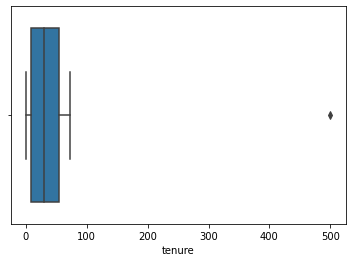

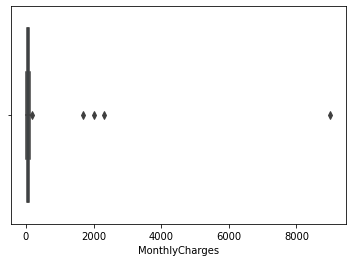

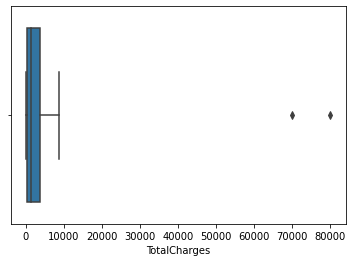

In [ ]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

#Your Codes here
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()			

plt.figure() # untuk embuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
			
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()			

# Mengatasai Outlier


Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik titik yang berada jauh dari gambar boxplotnya. Kemudian kalo kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai Maximum & Minimum dari interquartile range (IQR). Setelah di tangani outliernya, dan dilihat perseberan data nya, terlihat sudah tidak ada lagi nilai yang outlier.

In [ ]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     170.45625
TotalCharges      8864.95000
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -44.49375
TotalCharges     -4673.85000
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7070.000000     7070.000000   7070.000000
mean     32.376379       64.977741   2282.885962
std      24.573820       30.095469   2265.513347
min       0.000000        0.000000     19.000000
25%       9.000000       36.112500    403.200000
50%      29.000000       70.450000   1400.700000
75%      55.000000       89.850000   3787.900000
max     124.000000      170.456250   8864.950000


# Mendeteksi Nilai yang tidak standart

In [3]:
#Loop
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count\033[1m' + 'Before Standardized\033[0m Variable', col_name)
	print(df_load[col_name].value_counts())
 


Unique Values CountBefore Standardized Variable gender
Male         3581
Female       3512
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values CountBefore Standardized Variable SeniorCitizen
0    5962
1    1151
Name: SeniorCitizen, dtype: int64

Unique Values CountBefore Standardized Variable Partner
No     3676
Yes    3437
Name: Partner, dtype: int64

Unique Values CountBefore Standardized Variable Dependents
No     4978
Yes    2115
Iya      20
Name: Dependents, dtype: int64

Unique Values CountBefore Standardized Variable PhoneService
Yes    6423
No      690
Name: PhoneService, dtype: int64

Unique Values CountBefore Standardized Variable MultipleLines
No                  3428
Yes                 2995
No phone service     690
Name: MultipleLines, dtype: int64

Unique Values CountBefore Standardized Variable InternetService
Fiber optic    3125
DSL            2451
No             1537
Name: InternetService, dtype: int64

Unique Values CountBefore Standardized 

# Menstandarisasi nilai kategorik

In [9]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])


#Loop
for col_name in  list(['gender','Dependents','Churn']):
	print('\nUnique Values Count\033[1m'+'After Standardized\033[0m Variable', col_name)
	print(df_load[col_name].value_counts())
 # write your command here


Unique Values CountAfter Standardized Variable gender
Male    7113
Name: gender, dtype: int64

Unique Values CountAfter Standardized Variable Dependents
No     4978
Yes    2135
Name: Dependents, dtype: int64

Unique Values CountAfter Standardized Variable Churn
No     5195
Yes    1875
Name: Churn, dtype: int64


#Kesimpulan

Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah :

Gender **(Female, Male, Wanita, Laki-Laki)**, yang bisa di standarkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
Dependents **(Yes, No, Iya)**, yang bisa di standarkan nilainya menjadi **(Yes, No)** karena mempunyai makna yang sama.
Churn **(Yes, No, Churn)**, yang bisa di standarkan nilainya menjadi **(Yes, No)** karena mempunyai makna yang sama.
Setelah kita standarkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value nya.